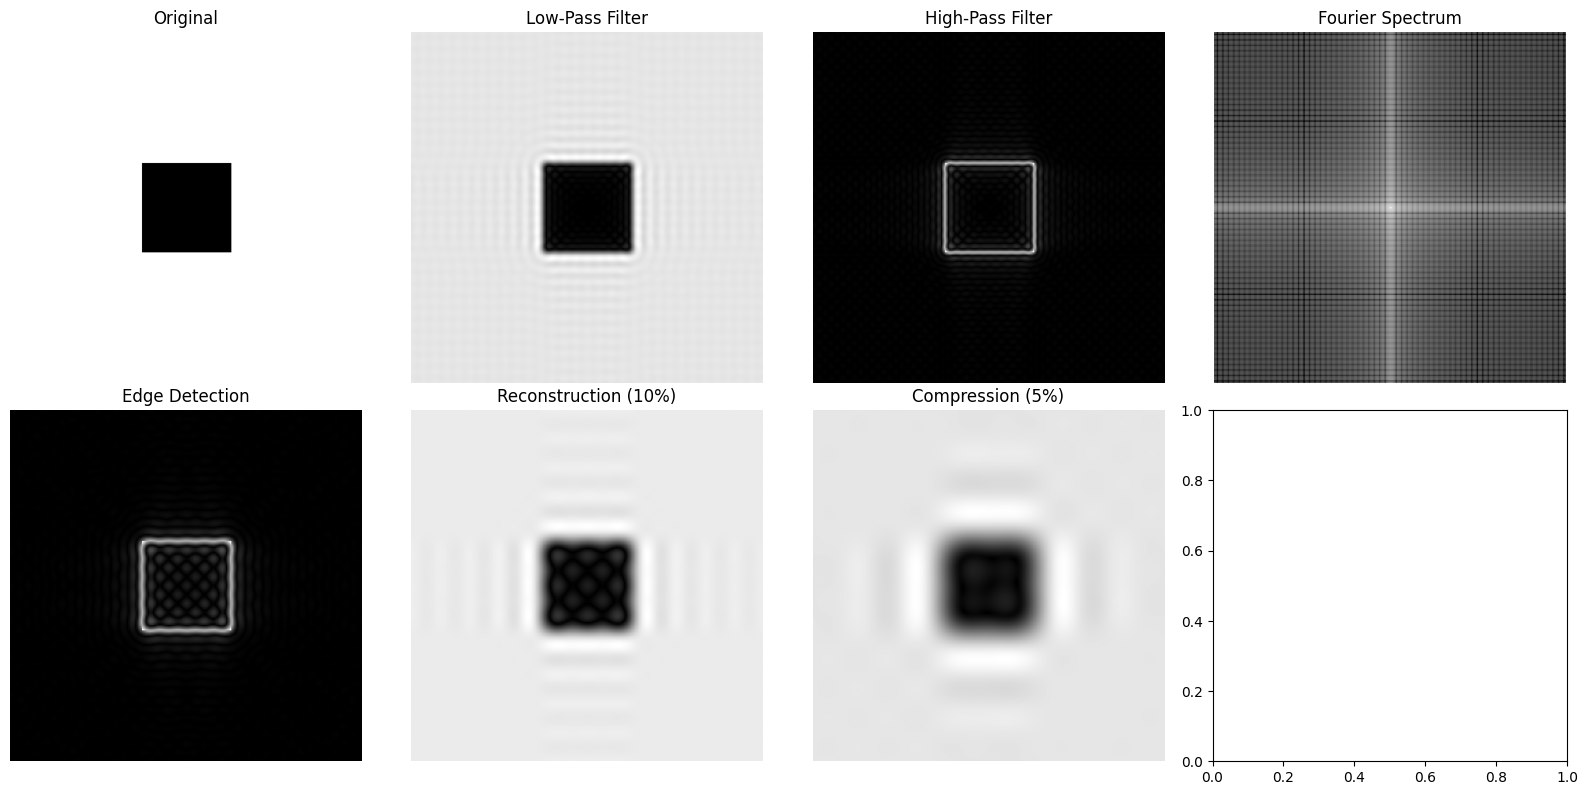

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Tạo ảnh mẫu trắng có hình vuông đen giữa ảnh
img = np.ones((256, 256), dtype=np.uint8) * 255
cv2.rectangle(img, (96, 96), (160, 160), 0, -1)

# 1. Lọc ảnh (Image Filtering): Low-pass & High-pass


def low_pass_filter(img, radius=30):
    f = fft2(img)
    fshift = fftshift(f)
    rows, cols = img.shape
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (cols//2, rows//2), radius, 1, -1)
    fshift_filtered = fshift * mask
    return np.abs(ifft2(ifftshift(fshift_filtered)))


def high_pass_filter(img, radius=30):
    f = fft2(img)
    fshift = fftshift(f)
    rows, cols = img.shape
    mask = np.ones((rows, cols), np.uint8)
    cv2.circle(mask, (cols//2, rows//2), radius, 0, -1)
    fshift_filtered = fshift * mask
    return np.abs(ifft2(ifftshift(fshift_filtered)))

# 2. Phân tích ảnh (Image Analysis): Trực quan hóa phổ Fourier


def fourier_spectrum(img):
    f = fft2(img)
    fshift = fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

# 3. Phát hiện biên (Edge Detection): Giữ lại tần số cao


def edge_detection_by_fft(img):
    return high_pass_filter(img, radius=20)

# 4. Tái tạo ảnh (Image Reconstruction): Giữ lại phổ trung tâm


def reconstruct_image(img, keep_percent=0.1):
    f = fft2(img)
    fshift = fftshift(f)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros_like(fshift)
    r = int(rows * keep_percent // 2)
    c = int(cols * keep_percent // 2)
    mask[crow-r:crow+r, ccol-c:ccol+c] = 1
    f_recon = fshift * mask
    return np.abs(ifft2(ifftshift(f_recon)))

# 5. Nén ảnh (Image Compression): Lấy mẫu tần số quan trọng


def compress_image(img, keep_percent=0.1):
    return reconstruct_image(img, keep_percent=keep_percent)


# Tạo hình ảnh kết quả
results = {
    "Original": img,
    "Low-Pass Filter": low_pass_filter(img),
    "High-Pass Filter": high_pass_filter(img),
    "Fourier Spectrum": fourier_spectrum(img),
    "Edge Detection": edge_detection_by_fft(img),
    "Reconstruction (10%)": reconstruct_image(img, 0.1),
    "Compression (5%)": compress_image(img, 0.05)
}

# Hiển thị
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for ax, (title, image) in zip(axs.flatten(), results.items()):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()
